c:\Users\Track Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,901 (15.24 KB)

 Trainable params: 3,901 (15.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0087 - val_loss: 0.0021
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.7625e-04 - val_loss: 9.9691e-04
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.6258e-04 - val_loss: 8.8721e-04
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.1057e-04 - val_loss: 8.5137e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.6505e-04 - val_loss: 7.9449e-04
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.9678e-04 - val_loss: 7.6519e-04
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.1769e-04 - val_loss: 6.6565e-04
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0114e-04 - val_loss: 6.4514e-04
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8838e-04 - val_loss: 6.3745e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


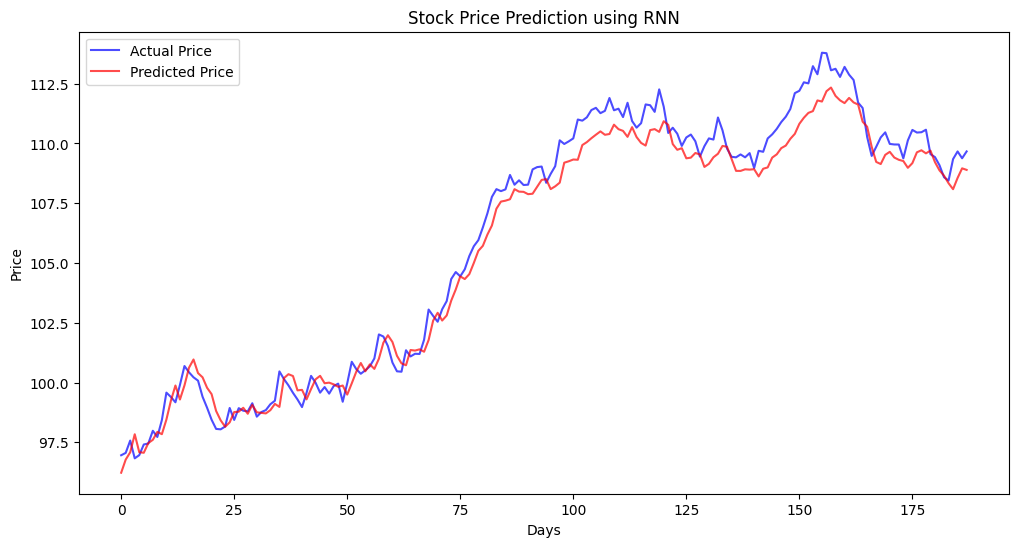

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
# Generate synthetic stock price data (for simplicity)
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=1000, freq='D')
prices = 100 + np.cumsum(np.random.randn(1000) * 0.5)  # Random walk
stock_data = pd.DataFrame({'Close': prices}, index=dates)
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)
# Create sequences
sequence_length = 60
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X, y = np.array(X), np.array(y)
# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build RNN model
model = keras.Sequential([
    keras.layers.SimpleRNN(50, return_sequences=False, input_shape=(sequence_length, 1)),
    keras.layers.Dense(25),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicted Price', color='red', alpha=0.7)
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()